In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [17]:
# Load the penguins dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [18]:
#  Check for missing values
penguins_df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [19]:
# Drop rows with missing values
penguins_clean = penguins_df.dropna()

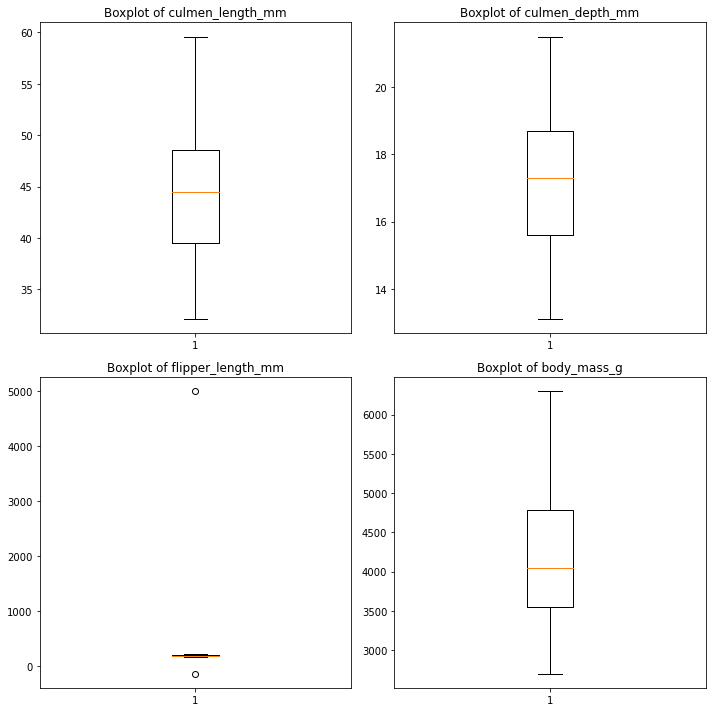

In [20]:
# Chck for outliers / Create boxplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].boxplot(penguins_clean['culmen_length_mm'])
axs[0, 0].set_title('Boxplot of culmen_length_mm')

axs[0, 1].boxplot(penguins_clean['culmen_depth_mm'])
axs[0, 1].set_title('Boxplot of culmen_depth_mm')

axs[1, 0].boxplot(penguins_clean['flipper_length_mm'])
axs[1, 0].set_title('Boxplot of flipper_length_mm')

axs[1, 1].boxplot(penguins_clean['body_mass_g'])
axs[1, 1].set_title('Boxplot of body_mass_g')

plt.tight_layout()
plt.show()

We can see a couple outlires in flipper_length_mm colum. Let's delete them

In [21]:
# Calculate IQR for flipper_length_mm to identify outliers
Q1 = penguins_clean['flipper_length_mm'].quantile(0.25)
Q3 = penguins_clean['flipper_length_mm'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify indices of outliers
outliers_indices = penguins_clean[(penguins_clean['flipper_length_mm'] < lower_bound) | (penguins_clean['flipper_length_mm'] > upper_bound)].index

# Extract outliers
outliers = penguins_clean.loc[outliers_indices]
print(outliers)

    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
9               42.0             20.2             5000.0       4250.0  MALE
14              34.6             21.1             -132.0       4400.0  MALE


In [22]:
# Remove outliers from the dataset
penguins_clean.drop(outliers_indices, inplace=True)

penguins_clean.shape

C:\Users\Denis\AppData\Local\Temp\ipykernel_16364\2514308760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean.drop(outliers_indices, inplace=True)


(333, 5)

In [23]:
# Convert categorical variables to dummy variables, dropping the 'sex_.' column
df = pd.get_dummies(penguins_clean).drop(columns='sex_.', axis=1)

In [24]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)

In [25]:
# Display the first 10 rows of the standardized data
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


In [26]:
# Perform PCA on the standardized data
pca = PCA()
X_pca = pca.fit(penguins_preprocessed)

In [27]:
# Calculate the explained variance ratio
explained_variance = pca.explained_variance_ratio_

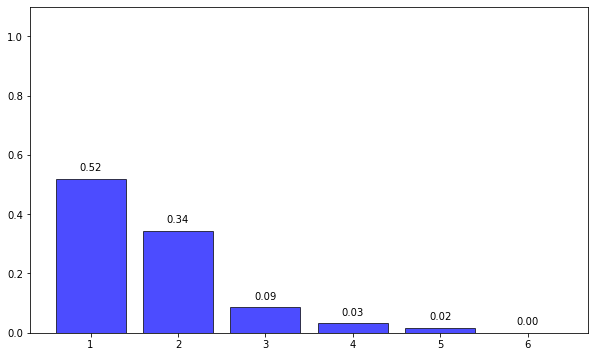

In [28]:
# Plot the explained variance for each principal component
plt.figure(figsize=(10, 6))
components = range(1, len(explained_variance) + 1)
plt.bar(components, explained_variance, alpha=0.7, align='center', color='blue', edgecolor='black')
plt.xticks(components)
plt.ylim(0, 1.1)
for i, v in enumerate(explained_variance):
    plt.text(i + 1, v + 0.02, f'{v:.2f}', ha='center', va='bottom')
plt.show()

Let's take 2 components

In [29]:
# Set the number of principal components to 2
n_components = 2
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


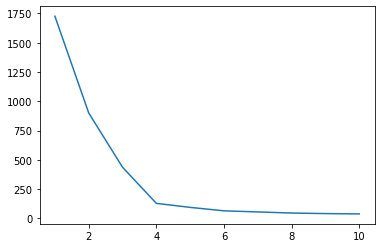

In [30]:
# Elbow method to find the optimal number of clusters for K-means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++").fit(penguins_PCA)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to visualize the elbow point
plt.plot(range(1, 11), wcss)
plt.show()

Take 4 clusters

In [31]:
# Set the number of clusters
n_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(penguins_PCA)

KMeans(n_clusters=4, random_state=42)

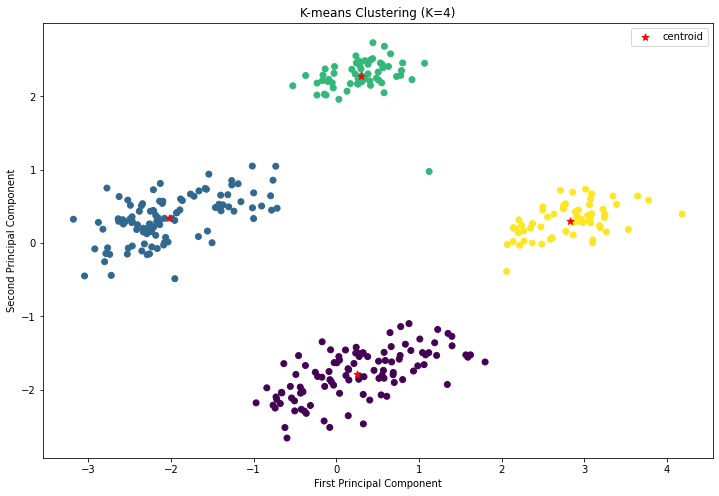

In [32]:
# Plot the clustered data with centroids
plt.figure(figsize=(12, 8))
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red', label='centroid', marker='*')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

In [33]:
# Add cluster labels to the original cleaned dataset
penguins_clean['label'] = kmeans.labels_

# Select numeric columns for statistical summary
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'label']

# Calculate and display the mean values for each cluster
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins

C:\Users\Denis\AppData\Local\Temp\ipykernel_16364\1816178570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean['label'] = kmeans.labels_


,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984
